<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_-/blob/main/ADP%EC%8B%A4%EC%8A%B5_1%EC%A3%BC%EC%B0%A8_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: https://jae-eun-ai.tistory.com/48

# 1. T - 검정

1-1 일표본 t-검정 (one sample t-test)

단일모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교하고자할 때, 일표본t검정에서는 모집단의 구성요소들이 정규분포를 이룬다는 가정하에 검정통계량 값을 계산/ 종속변수는 연속형 변수여야 하며 검증하고자 하는 기준값이 있어야 한다.

단일 모집단에서 알고자하는 값이 종속변수가 되며, 설정한 기준값과 종속변수의 평균값 사이의 차이가 통계적으로 유의하다면 두 값이 다르다고 결론을 내릴 수 있음

    Example)
    
    A과수원에서 생산된 사과의 평균무게는 200g으로 알려져있다. 실제로도 그러한지 알아보기 위해 과수원에서 생산되는 사과15개를 임의로 뽑아서 무게를 측정. 
    
    해당 데이터를 가지고 A과수원에서 생산되는 전체사과 무게의 평균이 200g과 같다고 할 수 있는지 검정해보자

    귀무가설 : A과수원에서 생산되는 사과무게의 평균값은 200g이다.
    대립가설 : A과수원에서 생산되는 사과무게의 평균값은 200g이 아니다.

In [2]:
#알려진 평균
mu = 200
#수집된 표본
data = [200,210,180,190,185,170,180,
       180,210,180,183,191,204,201,186]

#데이터가 적어도 30개 이상이면 중심극한 정리를 적용할 수 있지만
#여기서는 데이터 수가 15개 이기 때문에 별도의 정규성 검정이 필요
### 정규성 검정
from scipy.stats import shapiro
shapiro(data)

ShapiroResult(statistic=0.9217347502708435, pvalue=0.20472237467765808)

첫번째 결과는 검정통계치이고 두번째 값은 p-value이다. 정규성 검정에서는 p-value가 유의수준 0.05보다 클 경우 표본이 정규분포를 따른다고 판단 할 수 있다.

Text(0.5, 1.0, 'box plot')

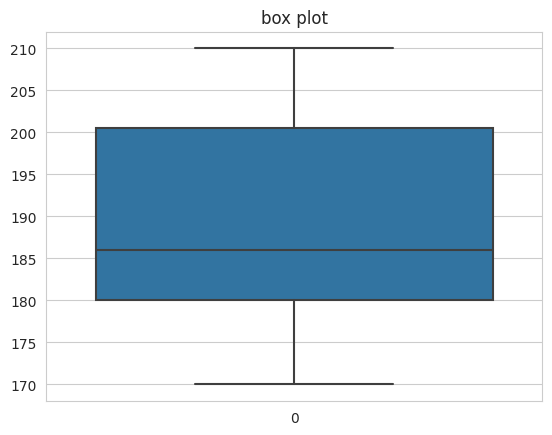

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

sns.boxplot(data=data)
plt.title('box plot')

In [4]:
# 일표본 t-검정
from scipy.stats import ttest_1samp

ttest_1samp(data, mu)

TtestResult(statistic=-3.1562714293709564, pvalue=0.007003780898109026, df=14)

검정통계량(t값)은 -3.156, 유의확률은 0.007004이다. p-value가 유의수준0.05보다 작기때문에 귀무가설을 기각하고, A과수원에서 생산되는 사과의 평균무게는 200g이 아니다라고 결론내릴 수 있다.
파이썬에서는 df, confidence interval, mean 정보가 없어서인지 조금 썰렁..

In [5]:
#자유도 계산
df = len(data) - 1
print(df)

#평균과 신뢰구간
from numpy import array,mean
from scipy.stats import sem,t
def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * array(data)
    n = len(a)
    m,se = mean(a),sem(a)
    h = se*t._ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h

mean_confidence_interval(data)

14


(190.0, 183.20468237313676, 196.79531762686324)

  1. T - 검정

    1-2.  대응표본 t-검정 (paired sample t-test)

    단일모집단에 대해 두번의 처리를 가했을 때, 두 개의 처리에 다른 평균의 차이를 비교하고자 할때 사용하는 검정

    하나의 모집단에서 크기가 n개인 하나의 표본을 추출한 후, 표본 내의 개채들에 대해서 두번의 측정을 실시한다.

    모집단과 표본은 하나씩이지만, 각 개체들에 대해 두 개씩의 관측값이 존재하므로 모수는 두개이다.

    모집단의 관측값이 정규성을 만족해야한다. 일반적으로 표본의 크기가 충분히 클 때 중심극한정리에 따라 정규성을 만족한다고 볼 수 있다. / 종속변수는 연속형 변수여야함

    부부 30쌍을 대상으로 남편과 아내의 결혼 만족도에 차이, 쌍둥이 연구, before-after 연구 모두 paired t-test를 사용



```
Example)

10명의 환자를 대상으로 수면영양제를 복용하기 전과 후의 수면시간을 측정하여 영양제의 효과가 있는지를 판단하고자 함. 표본이 정규성을 만족한다는 가정하에 단측검정 수행
귀무가설 : 수면영양제를 복용하기 전과 후의 평균 수면시간에는 차이가 없다.(D=0)
대립가설 : 수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 0보다 작다.(D<0)

```



In [7]:
import pandas as pd
before = [7,3,4,5,2,1,6,6,5,4]
after = [8,4,5,6,2,3,6,8,6,5]
when = ['before', 'after']
when = [when[j] for j in range(2) for i in range(10)]
data = pd.DataFrame({'when':when, 'score':before+after})
data.head(3)

,when,score
0,before,7
1,before,3
2,before,4


<Axes: xlabel='when', ylabel='score'>

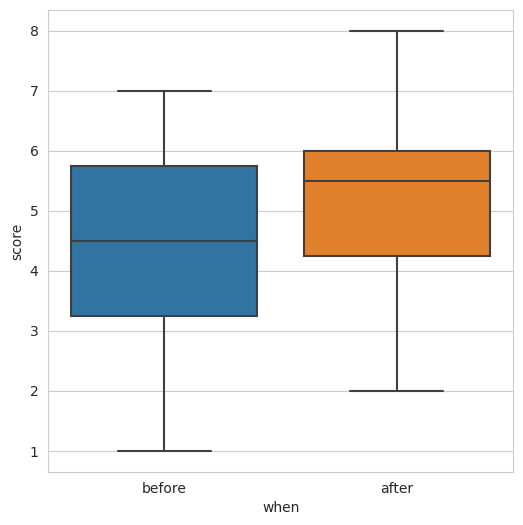

In [8]:
plt.figure(figsize=(6,6))
sns.boxplot(x='when', y='score', data=data)

In [9]:
#정규성 검정
from scipy.stats import shapiro

normal1 = shapiro(before)
normal2 = shapiro(after)
print(normal1, normal2)

#p-value모두 0.05보다 크기 때문에 정규성에 문제가 없음.

ShapiroResult(statistic=0.9644591808319092, pvalue=0.835266649723053) ShapiroResult(statistic=0.945683479309082, pvalue=0.6177965998649597)


In [10]:
# 등분산성 고려
from scipy.stats import levene
print(levene(before, after))

from scipy.stats import bartlett
print(bartlett(before, after))  

#p-value가 0.05보다 커서 등분산성이 있다고 할 수 있다.

LeveneResult(statistic=0.0, pvalue=1.0)
BartlettResult(statistic=0.007785808167159078, pvalue=0.9296881301038368)


In [11]:
import scipy.stats

# 대응표본 t검정 수행
scipy.stats.ttest_rel(before,after)

TtestResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528, df=9)

대응표본 t검정 수행결과, 검정통계량t값은 -4.7434, 유의확률은 0.001로 유의수준 0.05보다 작기때문에 귀무가설을 기각하고 수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 줄었다라는 결론을 내릴 수 있음

T - 검정

  1.3 독립표본 t-검정 (paired sample t-test)

  두개의 독립된 모집단의 평균을 비교하고자 할 때 사용하는 검정

  두 개의 모집단에서 크기가 n개인 표본을 각각 추출한 후 표본의 관측값들을 이용해 검정을 실시. 따라서 독립표본 t검정에서는 모집단, 모수, 표본이 모두 두개씩 존재.

  두 모집단은 정규성을 만족해야한다. 표본의 크기가 충분히 크다면 중심극한정리에 따라 정규성을 만족한다고 볼 수 있다. / 두개의 모집단은 서로 독립적이어야 한다. / 두 모집단의 분산이 서로 같음을 의미하는 등분산성 가정을 만족해야한다 (등분산성 가정은 두 독립집단의 모분산이 동일해야함을 의미)/ 독립변수는 범주형, 종속변수는 연속형이어야 한다.

  부부100쌍을 뽑아 남편 100명과 아내 100명으로 집단 비교하는 경우는 대응표본/ 무작위로 남자 100명 여자 100명을 뽑아 두 집단을 비교하는 경우는 독립표본

    Example)

    a,b두 지역의 겨울 낮 최고기온에 차이가 있는지를 알아보기 위해 10일동안 두 지역의 낮 최고기온을 측정한 데이터로 독립표본 t검정을 수행해보자. (표본이 정규성을 만족한다는 가정 하에 양측검정 수행)

    귀무가설 : a,b 두 지역에 따른 겨울 낮 최고기온은 차이가 없다.
    대립가설 : a,b 두 지역에 따른 겨울 낮 최고기온은 차이가 있다.

In [12]:
a = [-1,0,3,4,1,3,3,1,1,3]
b = [6,6,8,8,11,11,10,8,8,9]
group = ['a']*10 + ['b']*10
data = pd.DataFrame({'group':group, 'temp':a+b})
data.head(3)

,group,temp
0,a,-1
1,a,0
2,a,3


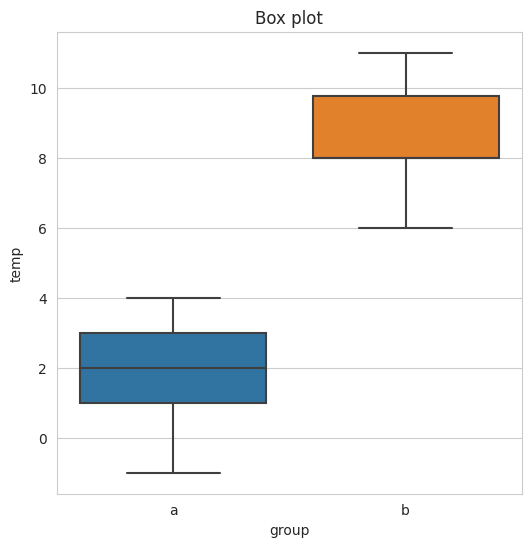

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(x='group', y='temp', data=data)
plt.title('Box plot')
plt.show()

In [15]:
# 데이터가 10개뿐이므로 shapiro-wilks의 정규성을 검정해보자
normal1 = shapiro(a)
normal2 = shapiro(b)
print(normal1, normal2)

#결과는 모두 p-value가 0.05보다 커서 정규성을 만족한다.

ShapiroResult(statistic=0.9004895687103271, pvalue=0.22182336449623108) ShapiroResult(statistic=0.9001172184944153, pvalue=0.21974670886993408)


In [16]:
#levene test로 등분산성을 검정
from scipy.stats import levene, ttest_ind
print(levene(a,b))

#등분산성을 bartlett test로 할 수도 있음 바틀렛
from scipy.stats import bartlett
print(bartlett(a,b))

#p-value가 유의수준 0.05보다 크기 때문에 귀무가설을 기각하지 않는다
#따라서 a,b두 집단의 데이터는 등분산성을 만족한다고 볼 수 있음. 

LeveneResult(statistic=0.04864864864864852, pvalue=0.8279140454175956)
BartlettResult(statistic=0.07575407415781324, pvalue=0.7831360213267907)


In [17]:
ttest_ind(a,b)

#검정 통계량은 -8.806, p-value는 6.085e-08이다. p-value가 0에 가까운 매우 작은 숫자로 
#유의수준보다 작기 때문에 귀무가설을 기각한다. 
#따라서 a,b두 지역의 겨울 낮 최고기온에는 통계적으로 유의한 차이가 존재한다는 결론을 내릴 수 있음

Ttest_indResult(statistic=-8.805969882200301, pvalue=6.085029390352169e-08)

In [18]:
#등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가합니다.

ttest_ind(a,b, equal_var=False)

Ttest_indResult(statistic=-8.805969882200301, pvalue=6.535174335638131e-08)

## 2. 일원배치 분산분석 (one-way ANOVA)

분산분석은 두 개이상의 집단에서 그룹 평균 간 차이를 그룹 내 변동에 비교하여 살펴보는 데이터 분석방법 : 여러 그룹간의 평균의 차이가 통계적으로 유의미 한지를 판단하기 위한 시험법

일원배치 분산분석은 반응값에 대해 하나의 범주형 변수의 영향을 알아보기 위해 사용되는 검증방법 : 한가지 변수의 변화가 결과 변수에 미치는 영향을 보기 위해 사용

F 검정 통계량을 이용

각 집단의 측정치는 서로 독립적이며 정규분포를 따른다.(정규성 가정) / 각 집단 측정치의 분산은 같다. (등분산 가정)


```
Example) 22명의 심장 수술을 받은 환자를 3가지 그룹으로 나누고 적혈구의 엽산 수치를 24시간 이후에 측정하였음.
```


In [19]:
import numpy as np
import urllib

url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')
data

array([[243.,   1.],
       [251.,   1.],
       [275.,   1.],
       [291.,   1.],
       [347.,   1.],
       [354.,   1.],
       [380.,   1.],
       [392.,   1.],
       [206.,   2.],
       [210.,   2.],
       [226.,   2.],
       [249.,   2.],
       [255.,   2.],
       [273.,   2.],
       [285.,   2.],
       [295.,   2.],
       [309.,   2.],
       [241.,   3.],
       [258.,   3.],
       [270.,   3.],
       [293.,   3.],
       [328.,   3.]])

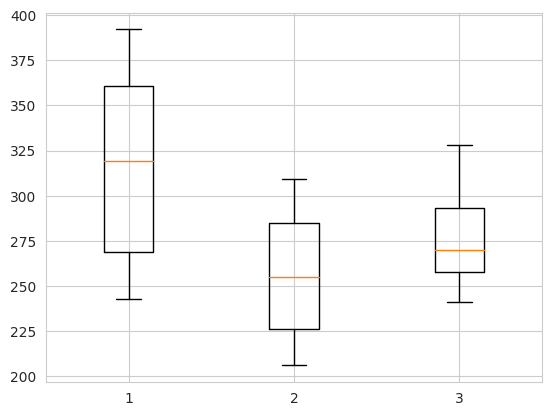

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

group1 = data[data[:,1]==1,0]  
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

plot_data = [group1, group2, group3]
plt.boxplot(plot_data)
plt.show()

boxplot에서 보듯이 평균값의 차이가 실제로 의미가 있는 차이인지, 분산이 커서 그런것인지 애매한 상황이다. 이런 상황에서 분산분석을 통해 통계적 유의성을 알아볼 수 있음.

    Statsmodel을 사용한 일원분산분석¶

In [21]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data, columns=['value','treatment'])
print(df.head(3))

model = ols('value ~ C(treatment)', df).fit()
print(anova_lm(model))

   value  treatment
0  243.0        1.0
1  251.0        1.0
2  275.0        1.0
                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN




```
Example2)
iris데이터를 이용해 종별로 꽃받침의 폭(sepal.width)의 평균이 같은지 혹은 차이가 있는지를 확인
귀무가설 : 세가지 종에 대해 sepal.width평균은 모두 같다.
대립가설 : 적어도 하나의 종에 대한 sepal.width의 평균값에는 차이가 있다.
```


In [22]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


step1 일원분산분석 가정 확인

In [23]:
#정규성 확인 - 집단(수준)별로 실시

from  scipy.stats import shapiro
print(shapiro(data.sepal_width[data.target==0]))
print(shapiro(data.sepal_width[data.target==1]))
print(shapiro(data.sepal_width[data.target==2]))

ShapiroResult(statistic=0.971718966960907, pvalue=0.2715126574039459)
ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


모두 p-value가 0.05 보다 크므로 각 집단의 자료가 정규성을 만족한다고 볼 수 있음.

(정규성 검정 귀무가설-> 정규성을 만족한다 이므로 위의 수치는 유의수준 0.05보다 크기 때문에 귀무가설을 기각하지 않는다. )

In [24]:
#등분산성 확인 - 레빈 검증
from scipy.stats import levene
print(levene(data.sepal_width[data.target==0],
      data.sepal_width[data.target==1],
      data.sepal_width[data.target==2]))

#등분산성 확인 - 바틀렛 검증
from scipy.stats import bartlett
print(bartlett(data.sepal_width[data.target==0],
      data.sepal_width[data.target==1],
      data.sepal_width[data.target==2]))

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)
BartlettResult(statistic=2.0910752014392338, pvalue=0.35150280041580323)


두 테스트 모두, 세 집단의 모분산에 유의미한 차이를 발견하지 못함. 등분산성 가정이 유지됨

step2 일원분산분석 수행

In [25]:
model = ols('sepal_width ~ C(target)', data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(target),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


Pr(>F)가 p-value. 이 값이 유의수준 0.05하에서 귀무가설을 기각함. 따라서 세가지 종에따른 꽃받침 폭이 모두 동일하지는 않다고 결론내릴 수 있다. 즉, 종별 꽃받침 폭의 평균값들 중에서 적어도 어느 하나의 종은 통계적으로 유의한 차이가 있다.
SSA의 자유도는 2(집단의 수-1=3-1), SST의 자유도는 147(관측값의 수-집단의 수=150-3)

step3 사후분석

분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을 경우, 어떤 집단들에 대해서 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석
조합 가능한 모든 쌍에 대해 비교를 하므로 과잉검증으로 인한 FWER 증가
널리 쓰이는 봉페로니 교정과 투키의 HSD를 소개
 

In [26]:
#사후분석을 위한 준비
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(data.sepal_width, data.target)

In [27]:
#봉페로니 교정

result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(data['sepal_width'], data['target'], alpha=0.05)
hsd.summary()

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     0      1   9.455    0.0       0.0   True
     0      2  6.4503    0.0       0.0   True
     1      2 -3.2058 0.0018    0.0055   True
---------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.658,0.0,-0.8189,-0.4971,True
0,2,-0.454,0.0,-0.6149,-0.2931,True
1,2,0.204,0.0088,0.0431,0.3649,True


pval=p-value 모든 종들에 대해서 꽃받침 폭의 평균값은 각각 통계적으로 유의한 차이가 있다는 것을 알 수 있음. 종 0과 1의 meandiff가 음수이기 때문에 꽃받침의 폭은 종이 0일때보다 1일때가 통계적으로 유의하게 큰 값을 가진다고 해석할 수 있음.

# 3. 일원배치 분산분석 (one-way ANOVA)

독립변인의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용
상호작용효과(Interaction effect), 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용

    Example) 

    태아의 머리 둘레 측정 데이터. 4명의 관측자가 3명의 태아를 대상으로 측정. 
    
    이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사

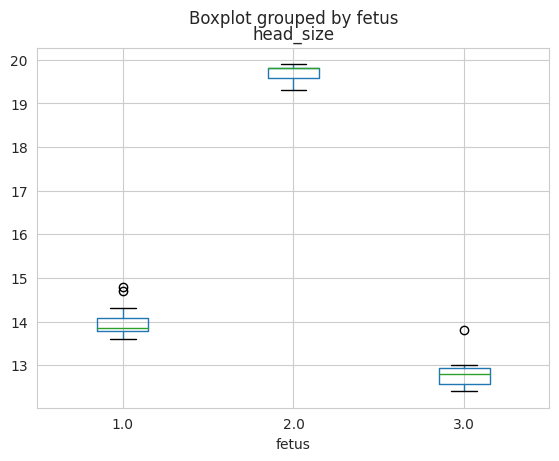

In [28]:
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt

inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

data = pd.DataFrame(data, columns=['head_size','fetus','observer'])
data.boxplot(column='head_size', by='fetus')
plt.show()
 

그림을 보면 태아fetus 3명의 머리둘레는 차이가 있어보이지만 이것이 관측자와 상호작용이 있는 것인지 분석을 통해 알아봐아야 함.

 


In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'head_size ~ C(fetus)+C(observer)+C(fetus):C(observer)'
lm = ols(formula, data).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


p-value가 0.05이상. 귀무가설을 기각할 수 없고 측정자와 태아의 머리둘레값에는 연관성이 없다고 할 수 있다. 측정하는 사람이 달라도 머리 둘레값은 일정한 것으로 해석할 수 있음.


#4. 교차분석

교차분석은 두 범주 변인 간 관계가 상호 독립 관계인지 아니면 상호 연관성을 맺고 있는지를 검증하는 방법
적합도 검정, 독립성 검정, 동일성 검정에 사용된다.
카이제곱 검정 통계량을 이용
이 중 카이제곱 교차분석은 실제로 나온 관찰빈도(observed frequency)와 각 셀에서 통계적으로 기대할 수 있는 빈도, 즉 기대빈도(expected frequency) 간에 얼마만큼의 차이가 있는지를 카이제곱 분포(chi-squared distribution)를 참조해 통계적으로 검증하는 통계 기법이다. 여기서 기대빈도는 모집단의 빈도 모수(parameter)와 일치하는 값이다.

  1) 적합도 검정

  k개의 범주 (혹은 계급)을 가지는 한 개의 요인(factor)에 대해서 어떤 이론적 분포를 따르고 있는지를 검정하는 방법
관측값들이 어떠한 이론적 분포를 따르고 있는지를 알아볼 수 있음.
모집단 분포에 대한 가정이 옳게 됐는지를 관측 자료와 비교하여 검정
귀무가설 : 실제분포와 이론적 분포 간에는 차이가 없다. (두 분포가 일치한다.)
대립가설 : 실제분포와 이론적 분포 간에는 차이가 있다. (두 분포가 일치하지 않는다.)

    Example1) 일원카이제곱검정

    제품 A,B,C의 보유대수를 조사하니 324대, 78대, 261대 -> 계:663
    제품의 판매량 비율은 A56%, B12%, C32% -> 기대빈도는 663 * 0.56 ...
    이 자료로 다음같은 관찰빈도와 기대빈도를 만들 수 있음
    귀무가설은 관찰빈도는 기대빈도와 같다
    대립가설은 관찰빈도와 기대빈도는 다르다

In [31]:
import pandas as pd

xo, xe = [324,78,261], [371,80,212]
xc = pd.DataFrame([xo,xe], columns=['ItemA','ItemB','ItemC'], index=['obs','exp'])
xc

,ItemA,ItemB,ItemC
obs,324,78,261
exp,371,80,212


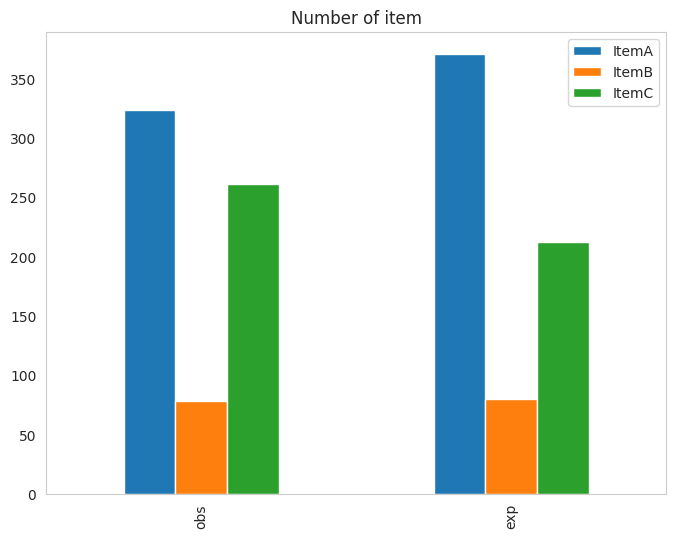

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

xc.plot(kind='bar', title='Number of item', figsize=(8,6))
plt.grid()

In [33]:
from scipy.stats import chisquare

result = chisquare(xo, f_exp=xe)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

p-value가 유의수준 0.05보다 아주 작은 값이므로 귀무가설을 기각하고 대립가설을 지지한다. 즉, 연구가설이 지지된다.

    Example 2) 일원카이제곱검정

    귀무가설 : 전체응답자 중 왼손잡이는 20%, 오른손잡이는 80%이다
    대립가설 : 전체응답자 중 왼손잡이의 비율은 20%, 오른손잡이의 비율이 80%라고 할 수 없다.

In [34]:
data = pd.DataFrame({'Left':[18], 'Right':[218]})
data
xo = [18,218]
xe = [47.2,188.8]

In [35]:
from scipy.stats import chisquare

result = chisquare(xo , f_exp=xe)
result

Power_divergenceResult(statistic=22.58050847457627, pvalue=2.0151876969887844e-06)

p-value가 유의수준 0.05보다 작으므로 전체응답자 중 왼손잡이는 20%, 오른손잡이는 80%라는 귀무가설을 기각한다.

2) 독립성 검정
 
모집단이 두 개의 변수 A,B에 의해 범주화되었을 때, 이 두 변수들 사이의 관계가 독립인지 아닌지를 검정하는 것을 의미
모집단을 범주화하는 기준이 되는 두 변수 A,B가 서로 독립적으로 관측값에 영향을 미치는지의 여부를 검정하는 것
귀무가설 : 두 변수 사이에는 연관이 없다. (독립이다.)
대립가설 : 두 변수 사이에는 연관이 있다. (종속이다.)


    Example1) 이원카이제곱검정

    제품1 ~3까지 여성과 남성의 판매량 차이에 대해 카이제곱검정

In [36]:
xf, xm = [269, 83, 215], [155, 57, 181]
x = pd.DataFrame([xf, xm], columns=['Item 1', 'Item 2', 'Item 3'], index=['Female', 'Male'])
x

,Item 1,Item 2,Item 3
Female,269,83,215
Male,155,57,181


In [37]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency([xf,xm])

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))
print(expected)

Test Statistic: 7.094264414804222
p-value: 0.028807134195296135
Degree of Freedom: 2
[[250.425   82.6875 233.8875]
 [173.575   57.3125 162.1125]]


자유도는 (3-1) * (2-1) = 2이고, p-value는 유의수준 0.05보다 작은 값으로 2개 그룹간에 차이가 있다고 판단할 수 있음

 

    Example2) 이원카이제곱검정

In [38]:
data = pd.DataFrame([[156,14,2,4],[124,20,5,4],[77,11,7,13],[82,36,15,7],[53,11,1,57]],\
                   columns=['wife','alternating','husband','jointly'], index=['landry','main_mean','dinner','breakfast','tidying'])
data

,wife,alternating,husband,jointly
landry,156,14,2,4
main_mean,124,20,5,4
dinner,77,11,7,13
breakfast,82,36,15,7
tidying,53,11,1,57


In [39]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expected = chi2_contingency(data)

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))
print(expected)

Test Statistic: 222.77883846736816
p-value: 0.028807134195296135
Degree of Freedom: 12
[[123.87982833  23.16452074   7.55364807  21.40200286]
 [107.69098712  20.13733906   6.56652361  18.60515021]
 [ 76.01716738  14.21459227   4.63519313  13.13304721]
 [ 98.54077253  18.42632332   6.00858369  17.02432046]
 [ 85.87124464  16.05722461   5.2360515   14.83547926]]


3) 동질성 검정
 
모집단이 임의의 변수에 따라 R개의 속성으로 범주화되었을 때, R개의 부분 모집단에서 추출한 각 표본인 C개으 범주화된 집단의 분포는 서로 동일한지 아닌지를 검정하는 것을 의미
귀무가설 : p(1j) = p(2j) = p(3j).. = p(nj) (n=1,2,...,r)
대립가설 : p(nj)중 다른 값이 하나이상 존재한다.
계산법과 검정법은 모두 독립성 검정과 같은 방법으로 진행

    Example) 

    귀무가설: 교육방법에 따른 교육생들의 만족도 차이가 없다.
    대립가설: 교육방법에 따른 교육생들의 만족도 차이가 있다.



In [40]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/survey_method.csv")
print(data.head(5))

   no  method  survey
0   1       1       1
1   2       2       2
2   3       3       3
3   4       1       4
4   5       2       5


In [41]:
ctab = pd.crosstab(index=data["method"], columns=data["survey"])
print(ctab)

survey  1   2   3   4  5
method                  
1       5   8  15  16  6
2       8  14  11  11  6
3       8   7  11  15  9


In [42]:
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(ctab)
msg = "chi2:{}, p-value:{}, df:{}"
print(msg.format(chi2, p, dof))

chi2:6.544667820529891, p-value:0.5864574374550608, df:8


p-value(0.58) > 0.05(95% 신뢰확률에서의 유의수준) 이므로 귀무가설을 채택한다.

즉, 교육방법에 따른 교육생들의 만족도에 차이가 없다고 할 수 있다.